In [3]:
%matplotlib inline

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Phase 1: testing/mungling/... (notebook `.ipynb`)

In [5]:
data = pd.read_csv("../data/vmm_flowdata.csv", parse_dates=True, index_col=0).dropna()

In [6]:
data.head()

,L06_347,LS06_347,LS06_348
Time,,,
2009-01-01 00:00:00,0.137417,0.097500,0.016833
2009-01-01 03:00:00,0.131250,0.088833,0.016417
2009-01-01 06:00:00,0.113500,0.091250,0.016750
2009-01-01 09:00:00,0.135750,0.091500,0.016250
2009-01-01 12:00:00,0.140917,0.096167,0.017000


## test Pandas features on time series

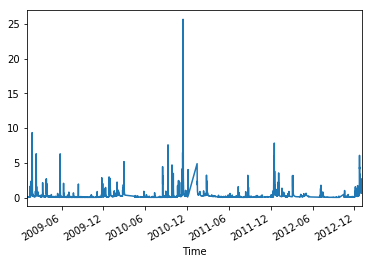

In [44]:
data["LS06_347"].plot()

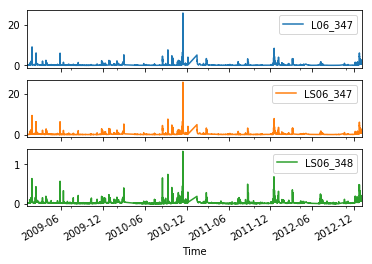

In [10]:
axes = data.plot(subplots=True)

We can derive **daily mean values** from the time series:

In [45]:
data.resample("D").mean().tail()

,L06_347,LS06_347,LS06_348
Time,,,
2012-12-29,0.807604,0.807604,0.078031
2012-12-30,1.027240,1.027240,0.088000
2012-12-31,0.748365,0.748365,0.081417
2013-01-01,1.733042,1.733042,0.142198
2013-01-02,0.860000,0.860000,0.075000


Or make a plot with **monthly maximum values** from the time series:

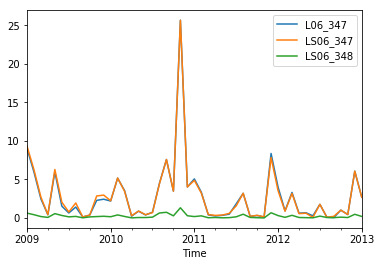

In [46]:
data.resample("M").max().plot()

## Implementing a model evaluation criteria

Root mean squared error (**numpy** based) - testing of function

In [47]:
modelled = data["L06_347"].values
observed = data["LS06_347"].values

In [48]:
residuals = observed - modelled

In [49]:
np.sqrt((residuals**2).mean())

0.058413036151786404

Converting this to a small function, to easily reuse the code - **[add docstring(!)](http://sphinxcontrib-napoleon.readthedocs.io/en/latest/example_numpy.html)**:

In [25]:
def root_mean_square_error(observed, modelled):
    '''
    Root Mean Square Error (RMSE)

    Parameters
    -----------
    observed : np.ndarray or pd.DataFrame
        observed/measured values of the variable
    observed : np.ndarray or pd.DataFrame
        simulated values of the variable
        
    Notes
    -------
    * range: [0, inf]
    * optimum: 0
    '''
    residuals = observed - modelled
    return np.sqrt((residuals**2).mean())

Test the created function:

In [26]:
root_mean_square_error(data["L06_347"].values, data["LS06_347"].values)

0.058413036151786404

In [27]:
#root_mean_square_error() # remove the comment, SHIFT-TAB inside the brackets and see your own docstring

Very brief basic/minimal setup of a docstring:

    '''very brief one-line function description
    A more extended description about the function...
    ...which can take multiple lines if required

    Parameters
    -----------
    inputname1 : dtype of inputname1
        description of the first input 
    inputname2 : dtype of inputname2
        description of the second input 
    ...
    
    Returns
    -------
    out1 : dtype of output
        description of the first output
    ...
        
    Notes
    -------
    Some information about your function,...
    '''

# Phase 2: I've got something useful here...

When satisfied about the function behavior: move it to a python (`.py`) file...


## Writing the useful elements into a function (towards python file `.py`)

Check the file [spreaddiagram](spreaddiagram.py) as an example... 



**Some advice:**

* Keep the functionalities small:
    * A single function has a single task
    * Keep the number of lines restricted (< 50 lines), unless you have good reasons
* Write [**docstrings**](http://sphinxcontrib-napoleon.readthedocs.io/en/latest/example_numpy.html)(!)
* Make your function more flexible with arguments and **named arguments**

## Using your function for real (anywhere: new notebooks `.ipynb`, new `.py` files)

Loading from my custom function

In [40]:
from spreaddiagram import spread_diagram, bias, root_mean_square_error

Using my new function:

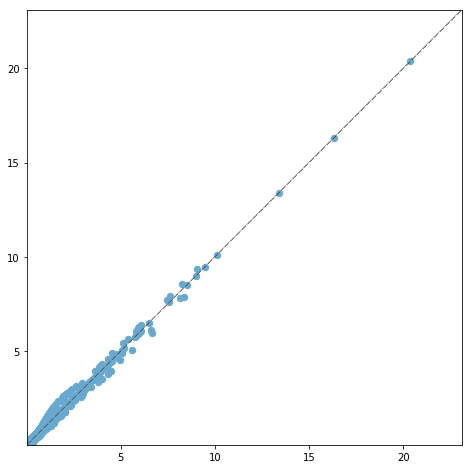

In [41]:
fig, ax = plt.subplots(figsize=(8, 8))

spread_diagram(ax, data["L06_347"].values, 
               data["LS06_347"].values, 
               infobox = False, 
               color="#67a9cf", 
               s=40)

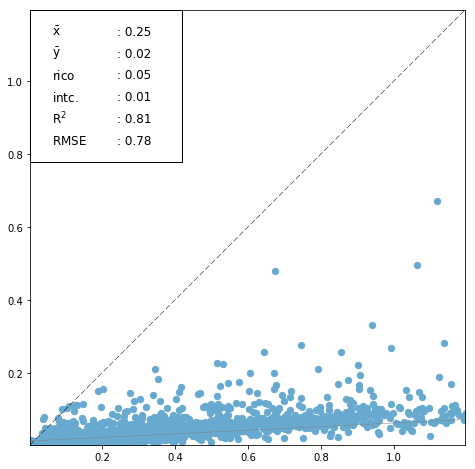

In [42]:
fig, ax = plt.subplots(figsize=(8, 8))

spread_diagram(ax, data["L06_347"].values, 
               data["LS06_348"].values, 
               infobox = True, 
               color="#67a9cf", 
               s=40)

In [58]:
data["LS06_348"].resample('M').mean().values

array([ 0.04559677,  0.0472381 ,  0.03758097,  0.0213559 ,  0.02074395,
        0.01457604,  0.01164113,  0.0092836 ,  0.00832222,  0.01025706,
        0.02297882,  0.04608837,  0.03431317,  0.05282664,  0.07046354,
        0.01222495,  0.00956284,  0.00698854,  0.00744624,  0.01791398,
        0.03093125,  0.03521035,  0.08938333,  0.06021167,  0.04388263,
        0.03120461,  0.01778259,  0.01134167,  0.00826142,  0.00656736,
        0.01045598,  0.01609308,  0.00921778,  0.00921505,  0.00939195,
        0.05831687,  0.03897715,  0.01784483,  0.03046707,  0.01808017,
        0.01705654,  0.0075664 ,  0.02096037,  0.00854536,  0.00627724,
        0.01454664,  0.01385312,  0.08782258,  0.13473148])

or using the resampling of the data:

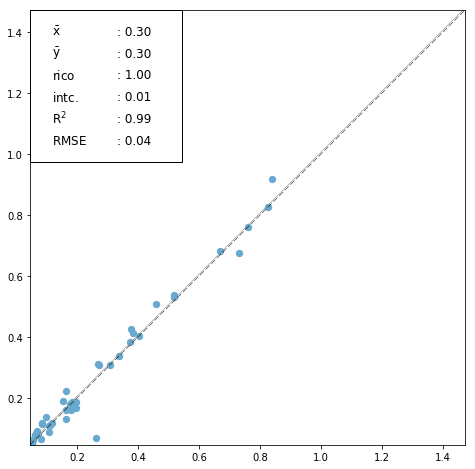

In [60]:
L06_347_monthmean = data["L06_347"].resample('M').mean().values
LS06_347_monthmean = data["LS06_347"].resample('M').mean().values

fig, ax = plt.subplots(figsize=(8, 8))

spread_diagram(ax, L06_347_monthmean, LS06_347_monthmean, 
               infobox = True, 
               color="#67a9cf", 
               s=40)

Using my new function, while keeping the option for ad-hoc adaptations on the graph itself:

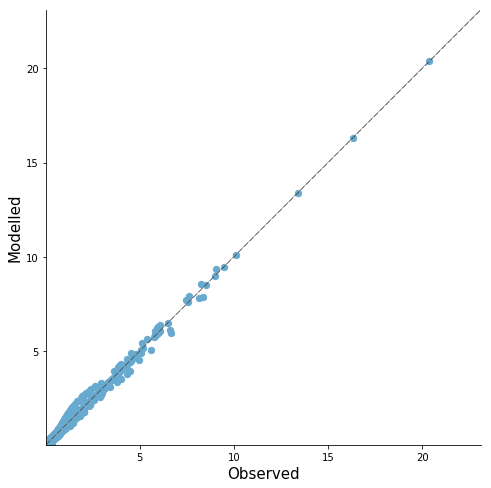

In [30]:
fig, ax = plt.subplots(figsize=(8, 8))

spread_diagram(ax, data["L06_347"].values, 
               data["LS06_347"].values, 
               infobox = False, 
               color="#67a9cf", 
               s=40)
ax.set_ylabel("Modelled", fontsize=15)
ax.set_xlabel("Observed", fontsize=15)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

**Remark**: when you have to select colors: http://colorbrewer2.org/#type=sequential&scheme=BuGn&n=3

-----------------------------------------------------------

# Phase 3 (optional): It is a recurrent task (towards cmd/bash functionality)

When using this on regular basis (e.g. you frequently get output text files from a model), it is worthwile to make the same functionality available outside python as well (as command line function or inside bash scripts)!

A minimal working template:

In [131]:
%%file puretest.py

import sys


def main(argv=None):
    # first argument argv[0] is always the python file name itself
    print('Working on the', argv[0], 'file, with the argument', argv[1]) 
    

if __name__ == "__main__":
    sys.exit(main(sys.argv))    

Overwriting puretest.py


**Want to dive into the command line options?**
* example with more advanced arguments: https://github.com/inbo/inbo-pyutils/blob/master/gbif/gbif_name_match/gbif_species_name_match.py
* pure python library to support you on the argument parsing: https://docs.python.org/3/library/argparse.html
* library for more advanced support (eacy creation of cmd interface): http://click.pocoo.org/5/

# Phase 4 (optional): You need more python power (towards python package)

* When working together with other people on the code, 
* when requiring more advance management of the code, 
* when installation on new machines should be more easy
* when you want to make your code installable by others
* ...

**Create a package from your code...**

As an example: https://github.com/inbo/data-validator

* Actually it is not that much more as a set of files in a folder accompanied with a `setup.py` file
* register on [pypi](https://pypi.python.org/pypi) and people can install your code with: `pip install your_awesome_package_name`
* Take advantage of **unit testing**, **code coverage**,... the enlightning path of code development!
